In [9]:
# Classification
import math
import h5py
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import GlobalAveragePooling1D, Conv1D, GlobalMaxPooling1D
from keras.layers import Dense
from keras.regularizers import L1L2
from tensorflow.keras.models import Model
from tensorflow.keras import layers, losses, regularizers
#from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, confusion_matrix, auc
from sklearn.metrics import roc_auc_score, precision_recall_curve
import pandas as pd
import os

In [10]:
# Best performing architect

# CM: [39 2 4 29]
# Accuracy: 0.919
# Sensitivity: 0.879
# Specificity: 0.951
# MCC: 0.836

# def create_model():
#     # Create model
#     model = Sequential()
#     model.add(Conv1D(filters=32, kernel_size=14, strides=1, activation='relu', input_shape=[None,1], name = 'L1'))
#     model.add(tf.keras.layers.Dropout(0.2)),  # dropout rate of 0.2
#     model.add(Conv1D(filters=32, kernel_size=4, strides=1, activation='relu', name = 'L2'))  # New Conv1D layer
#     #model.add(Conv1D(filters=16, kernel_size=3, strides=1, activation='relu', name = 'L3'))  # New Conv1D layer
#     model.add(GlobalAveragePooling1D())
#     model.add(Dense(32, activation='relu'))
#     model.add(Dense(1, activation='sigmoid', name='classification'))
#     # Compile model
#     adam = tf.keras.optimizers.Adam(learning_rate=1.e-04)
#     model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#     #model.summary()
#     return model

In [11]:
folds = 5

# Function to create model, required for KerasClassifier
def create_model():
    # Create model
    model = Sequential()
    model.add(Conv1D(filters=64, kernel_size=8, strides=1, activation='relu', padding = 'same', input_shape=[None,1], name = 'L1'))
    model.add(tf.keras.layers.Dropout(0.4)),  # dropout rate of 0.2
    model.add(Conv1D(filters=64, kernel_size=6, strides=1, activation='relu', padding ='same', name = 'L2'))  # New Conv1D layer
    model.add(Conv1D(filters=32, kernel_size=2, strides=1, activation='relu', name = 'L3'))  # New Conv1D layer
    #model.add(Conv1D(filters=16, kernel_size=3, strides=1, activation='relu', name = 'L3'))  # New Conv1D layer
    model.add(GlobalAveragePooling1D())
    model.add(tf.keras.layers.Dropout(0.4))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='sigmoid', name='classification'))
    # Compile model
    adam = tf.keras.optimizers.Adam(learning_rate=1.e-04)
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    #model.summary()
    return model

In [12]:
# copy of Rahul's model
# def create_model():
#     # Create model
#     model = Sequential()
#     model.add(Conv1D(filters=14, kernel_size=10, strides=1, activation='relu', input_shape=[None,1]))
#     model.add(GlobalAveragePooling1D())
#     model.add(Dense(1, activation='sigmoid', name='classification'))
#     # Compile model
#     adam = tf.keras.optimizers.Adam(lr=1.e-04)
#     model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#     #model.summary()
#     return model

In [13]:
# Fix random seed for reproducibility
seed = 128
np.random.seed(seed)
# Split into input (X) and output (y) variables
dir = r'C:\Users\_Kamat_\Desktop\RPI\ResearchWork\Papers_\Effective_Connectivity\EEG_fNIRS_paper_Brain_informatics\channelEEG_codes_results_alphaBand\Results\Connectivities_LSTMED'
csvfilename = 'entireTrial_LSTMConnectivity2.csv'
# csvfilename = 'EEG_GC_Exp_Nov_T123_svmSelectedConn.csv'
data = pd.read_csv(os.path.join(dir,csvfilename)).values
m,n = data.shape
X0 = data[:,0:n-1]
print(X0.shape)
X = X0.reshape(X0.shape[0],X0.shape[1],1)
print(X.shape)
y = data[:,n-1]
#print(y)
y = np.array([0 if y[i]==-1 else 1 for i in range(len(y))])
print(y)

(74, 20)
(74, 20, 1)
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [14]:
classifier = create_model() #KerasClassifier(build_fn=create_model, epochs=2000, batch_size=5, verbose=0)
classifier.summary()

c:\Users\_Kamat_\Desktop\RPI\ResearchWork\Papers_\Effective_Connectivity\tfLSTM_ED\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Conv1D)                     │ (None, None, 64)       │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, None, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L2 (Conv1D)                     │ (None, None, 64)       │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ L3 (Conv1D)                     │ (None, None, 32)       │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_11     │ (None, 32)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ classification (Dense)          │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,433 (118.88 KB)

 Trainable params: 30,433 (118.88 KB)

 Non-trainable params: 0 (0.00 B)

In [15]:
def model_performance(y_true, y_pred):
    # ROC and AUC
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    area = auc(fpr, tpr)
    # calculate the g-mean for each threshold
    gmeans = np.sqrt(tpr * (1-fpr))
    # locate the index of the largest g-mean
    ix = np.argmax(gmeans)
    #print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

    # calculate roc curves
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
    area = auc(recall, precision)
    # convert to f score
    fscore = (2 * precision * recall) / (precision + recall)
    # locate the index of the largest f score
    ix = np.argmax(fscore)
    #print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

    # Making the Confusion Matrix [tn, fp, fn, tp]
    tn, fp, fn, tp = confusion_matrix(y_true, (y_pred >= thresholds[ix])).ravel()
    N = tn+fp+fn+tp
    S = (tp+fn)/N
    P = (tp+fp)/N
    MCC = ((tp/N)-S*P)/np.sqrt(P*S*(1.-S)*(1.-P))
    accuracy = (tp+tn)/(tn+fp+fn+tp)
    sensitivity = (tp)/(tp+fn)
    specificity = (tn)/(tn+fp)

    return accuracy, sensitivity, specificity, MCC, tn, fp, fn, tp, y_true, y_pred

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def evaluate_classifier(XX, yy):
    # Assuming classifier_function() returns a trained classifier
    y_true = []
    y_pred = []
    itest = []
    kf = StratifiedKFold(n_splits=folds, shuffle=False)
    #kf = KFold(n_splits=folds, shuffle=True, random_state=seed)
    for train, test in kf.split(XX,yy):
        x_train, x_test, y_train, y_test = XX[train], XX[test], yy[train], yy[test]

        classifier = create_model() #KerasClassifier(build_fn=create_model, epochs=2000, batch_size=5, verbose=0)
        es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)
        classifier.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5000, batch_size=8, shuffle=True, verbose=0, callbacks=[es]) #, callbacks=[es]
        # Predicting the Test set results
        k_pred = classifier.predict(x_test)
        y_true = np.append(y_true, y_test)
        y_pred = np.append(y_pred, k_pred)
    metrics = model_performance(y_true, y_pred) #tuple of metrics
    
    return metrics
# Initialize lists to store feature indices and corresponding accuracies
feature_indices = list(range(X.shape[1]))

accuracies = []
# Iterate over each feature, dropping one at a time
for i in range(X.shape[1]):   #range(X.shape[1])
    X_reduced = np.delete(X, i, axis=1)  # remove one feature
    # Evaluate accuracy with reduced feature set
    metrics = evaluate_classifier(X_reduced, y)
    reduced_accuracy = metrics[0] #extract accuracy
    # Append the accuracy and feature index to lists
    accuracies.append(reduced_accuracy)
#accuracies.append([0.86,0.59,0.71,0.93,0.78,0.84,0.94,0.93,0.5])
accuracies = np.squeeze(accuracies)
sorted_indices = np.argsort(accuracies)
print(accuracies)
print(sorted_indices)

feature_ranking = [feature_indices[i] for i in sorted_indices]
accuracies_ranked = [accuracies[i] for i in sorted_indices]
print(feature_ranking[:10]) # select the top 10 features

# # Print the ranked features and their corresponding accuracies
# for rank, (feature_index, accuracy) in enumerate(zip(feature_ranking, accuracies_ranked), 1):
#     print(f"Rank {rank}: Feature {feature_index}, Accuracy: {accuracy}")

c:\Users\_Kamat_\Desktop\RPI\ResearchWork\Papers_\Effective_Connectivity\tfLSTM_ED\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 51: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Epoch 60: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Epoch 74: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Epoch 55: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
Epoch 102: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step


C:\Users\_Kamat_\AppData\Local\Temp\ipykernel_16480\2809955162.py:15: RuntimeWarning: invalid value encountered in divide
  fscore = (2 * precision * recall) / (precision + recall)
c:\Users\_Kamat_\Desktop\RPI\ResearchWork\Papers_\Effective_Connectivity\tfLSTM_ED\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 51: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
Epoch 57: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Epoch 63: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
Epoch 54: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
Epoch 88: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


C:\Users\_Kamat_\AppData\Local\Temp\ipykernel_16480\2809955162.py:15: RuntimeWarning: invalid value encountered in divide
  fscore = (2 * precision * recall) / (precision + recall)
c:\Users\_Kamat_\Desktop\RPI\ResearchWork\Papers_\Effective_Connectivity\tfLSTM_ED\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 51: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
Epoch 58: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Epoch 66: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step


In [ ]:
print(accuracies)
print(accuracies_ranked)
print(feature_ranking)
print(X[:,feature_ranking[:10],:].shape)
print(X[:,feature_ranking[:10],:])

[0.85135135 0.86486486 0.83783784 0.78378378 0.82432432 0.85135135
 0.87837838 0.81081081 0.82432432 0.85135135 0.85135135 0.85135135
 0.81081081 0.78378378 0.83783784 0.7972973  0.7972973  0.85135135
 0.83783784 0.87837838]
[0.7837837837837838, 0.7837837837837838, 0.7972972972972973, 0.7972972972972973, 0.8108108108108109, 0.8108108108108109, 0.8243243243243243, 0.8243243243243243, 0.8378378378378378, 0.8378378378378378, 0.8378378378378378, 0.8513513513513513, 0.8513513513513513, 0.8513513513513513, 0.8513513513513513, 0.8513513513513513, 0.8513513513513513, 0.8648648648648649, 0.8783783783783784, 0.8783783783783784]
[3, 13, 16, 15, 7, 12, 4, 8, 2, 18, 14, 0, 17, 9, 10, 5, 11, 1, 6, 19]
(74, 10, 1)
[[[0.02971354]
  [0.01246106]
  [0.1044618 ]
  [0.02840845]
  [0.143098  ]
  [0.00329167]
  [0.06230524]
  [0.0232809 ]
  [0.01598066]
  [0.04035031]]

 [[0.00534502]
  [0.00909537]
  [0.01478964]
  [0.00347615]
  [0.00920796]
  [0.00423576]
  [0.0165639 ]
  [0.00275245]
  [0.02423662]
  [0

In [ ]:
# Evaluate accuracy using all features
initial_model_metrics = evaluate_classifier(X, y)  #accuracy, sensitivity, specificity, MCC, (tn, fp, fn, tp)
accuracies = []
# Final model test with top 10 features.
X_final = X[:,feature_ranking[:10],:]
final_model_metrics = evaluate_classifier(X_final, y)

c:\Users\kamata3\Work\Brain\Brain_network\EEG_fNIRS_paper_Brain_informatics\channelEEG_codes_results_alphaBand\Codes_1DCNN\venv_1DCNN\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1463: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
Epoch 477: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Epoch 693: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
Epoch 765: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
Epoch 1562: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


c:\Users\kamata3\Work\Brain\Brain_network\EEG_fNIRS_paper_Brain_informatics\channelEEG_codes_results_alphaBand\Codes_1DCNN\venv_1DCNN\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 623: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
Epoch 441: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Epoch 1436: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
Epoch 1144: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Epoch 996: early stopping
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


In [ ]:
# ROC and AUC
def plot_model_performace(metrics, type):
    y_true, y_pred = metrics[-2],metrics[-1]
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    area = auc(fpr, tpr)

    # calculate the g-mean for each threshold
    gmeans = np.sqrt(tpr * (1-fpr))
    # locate the index of the largest g-mean
    ix = np.argmax(gmeans)
    print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

    plt.figure()
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label='AUC = {:.3f}'.format(area))
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title('ROC curve '+str(type))
    plt.legend(loc='best')
    plt.show()
    plt.close()

    # calculate roc curves
    precision, recall, thresholds = precision_recall_curve(y_true, y_pred)
    area = auc(recall, precision)
    # convert to f score
    fscore = (2 * precision * recall) / (precision + recall)
    # locate the index of the largest f score
    ix = np.argmax(fscore)
    print('Best Threshold=%f, F-Score=%.3f' % (thresholds[ix], fscore[ix]))

    # plot the roc curve for the model
    plt.figure()
    no_skill = len(y_true[y_true==1]) / len(y_true)
    plt.plot([0,1], [no_skill,no_skill], linestyle='--')
    plt.plot(recall, precision, marker='.', label='AUC = {:.3f}'.format(area))
    #plt.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
    # axis labels
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()
    plt.title('PR curve '+str(type))
    # show the plot
    plt.show()
    plt.close()

    # Making the Confusion Matrix [tn, fp, fn, tp]
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
    tn, fp, fn, tp = confusion_matrix(y_true, (y_pred >= thresholds[ix])).ravel()
    N = tn+fp+fn+tp
    S = (tp+fn)/N
    P = (tp+fp)/N
    MCC = ((tp/N)-S*P)/np.sqrt(P*S*(1.-S)*(1.-P))
    accuracy = (tp+tn)/(tn+fp+fn+tp)
    sensitivity = (tp)/(tp+fn)
    specificity = (tn)/(tn+fp)

    print("CM: [%d %d %d %d]" %(tn, fp, fn, tp))
    print("Accuracy: %0.3f" %(accuracy))
    print("Sensitivity: %0.3f" %(sensitivity))
    print("Specificity: %0.3f" %(specificity))
    print("MCC: %0.3f" %(MCC))

    # from sklearn.metrics import plot_confusion_matrix, confusion_matrix
    from matplotlib import rcParams
    #rcParams['font.sans-serif'] = ['calibri']  # You can change 'Arial' to any other desired font
    rcParams['font.size'] = 14
    tn, fp, fn, tp = metrics[-6:-2]
    conf_matrix = [[tn, fp],
                [fn, tp]]
    conf_matrix =confusion_matrix(y_true, (y_pred >= thresholds[ix]))
    # Plot the confusion matrix
    labels = ['Novice', 'Expert']
    # plot_confusion_matrix(conf_matrix, display_labels=labels, cmap=plt.cm.Blues, normalize=None)

    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,display_labels=labels)
    disp.plot()
    plt.title('CM '+str(type))
    plt.show()
    plt.close()

    return None

Best Threshold=0.308253, G-Mean=0.816


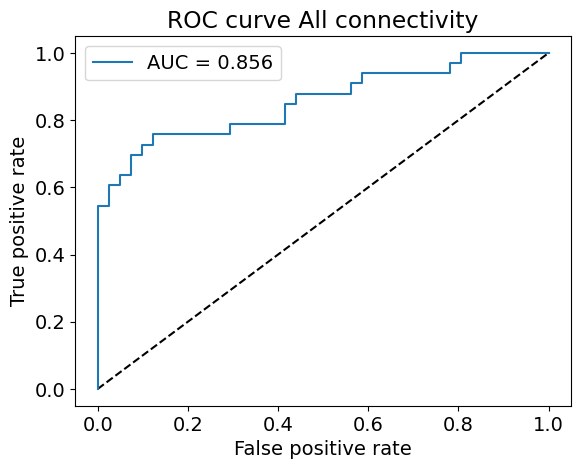

Best Threshold=0.308253, F-Score=0.794


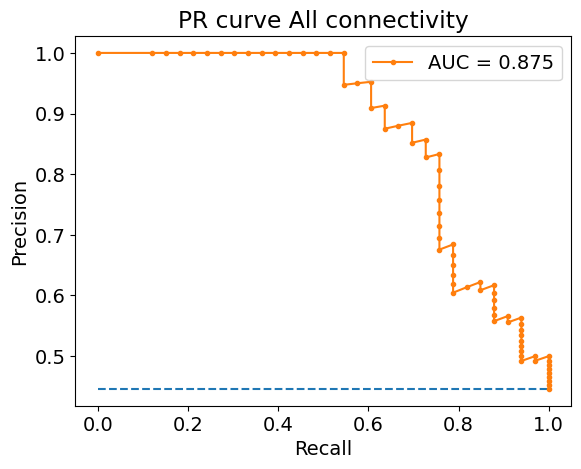

CM: [36 5 8 25]
Accuracy: 0.824
Sensitivity: 0.758
Specificity: 0.878
MCC: 0.644


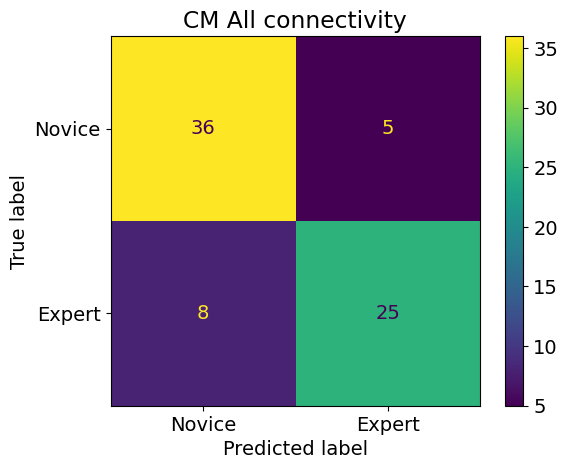

In [ ]:
plot_model_performace(initial_model_metrics, type= 'All connectivity')


Best Threshold=0.579602, G-Mean=0.820


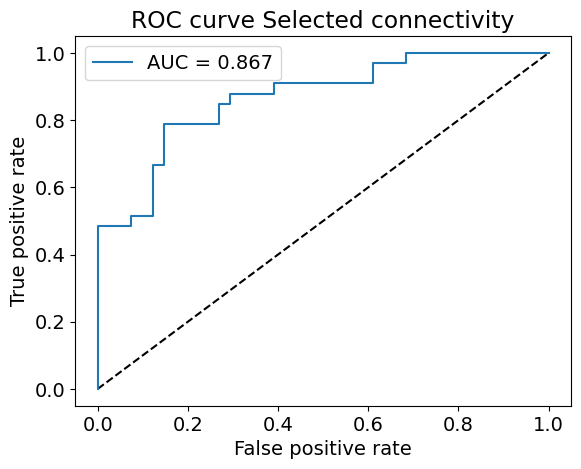

Best Threshold=0.579602, F-Score=0.800


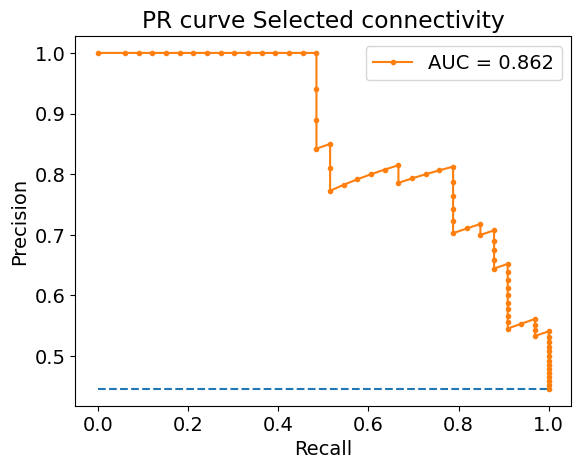

CM: [35 6 7 26]
Accuracy: 0.824
Sensitivity: 0.788
Specificity: 0.854
MCC: 0.644


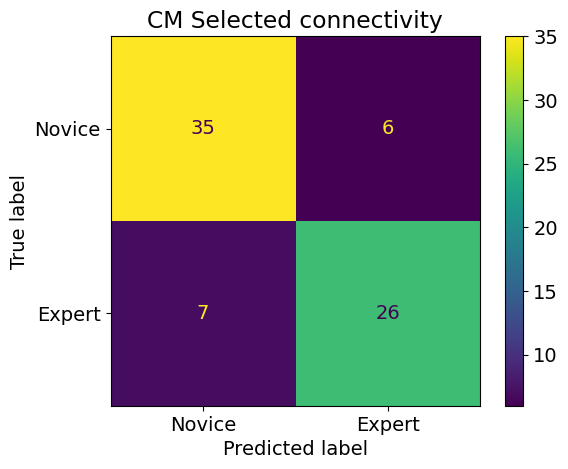

In [ ]:
plot_model_performace(final_model_metrics, type= 'Selected connectivity')